In [1]:
# imports
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
# local
import wrangle as w
import explore as e
import modeling as m

In [2]:
# 52,441 rows to 51,046, drop less than 3%

In [3]:
df = w.get_zillow()
df

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,17173851,787,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,64712.0,2016.0,17519.0,781.00,NaN,NaN,6.111004e+13,389.0,0.088469,2017-01-03
1,10821119,1702,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,381638.0,2016.0,274127.0,4692.27,NaN,NaN,6.037131e+13,402.0,0.025629,2017-01-03
2,11007640,2412,1.0,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,305307.0,2016.0,160505.0,3887.80,NaN,NaN,6.037106e+13,2699.0,0.020360,2017-01-12
3,11457850,3770,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,93146.0,2016.0,54446.0,1246.18,NaN,NaN,6.037276e+13,2229.0,0.054233,2017-01-11
4,12591550,8197,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,482242.0,2016.0,385591.0,6098.62,NaN,NaN,6.037544e+13,3038.0,-0.016170,2017-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,12885754,2976765,NaN,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,200214.0,2016.0,106817.0,2629.33,NaN,NaN,6.037403e+13,42657.0,0.515289,2017-06-01
52437,13869000,2977815,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,215695.0,2016.0,80652.0,2607.04,NaN,NaN,6.059002e+13,32297.0,0.009512,2017-05-02
52438,13890509,2977914,NaN,NaN,NaN,4.0,3.0,NaN,NaN,4.0,...,1389962.0,2016.0,1118935.0,14935.72,NaN,NaN,6.059063e+13,28537.0,-0.031048,2017-04-21
52439,17246810,2980979,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,...,403678.0,2016.0,201839.0,4880.90,NaN,NaN,6.111008e+13,8396.0,-0.031665,2017-02-07


In [4]:
df = w.prep4ex_zillow(df)
df

,year,baths,beds,roomcnt,fireplacecnt,garagecarcnt,hashottuborspa,pools,area,stories,county,latitude,longitude,prop_value
0,1952,2.0,4,6.0,1.0,0.0,0.0,0.0,1848,1.0,Ventura,34153345.0,-119194015.0,64712
1,1952,2.0,2,0.0,0.0,0.0,0.0,1.0,1430,0.0,LA,34217763.0,-118504217.0,381638
2,1976,2.0,3,0.0,0.0,0.0,0.0,0.0,1572,0.0,LA,34326995.0,-118426172.0,305307
3,1941,2.0,3,0.0,0.0,0.0,0.0,0.0,1412,0.0,LA,33962085.0,-118393253.0,93146
4,1959,2.0,3,0.0,0.0,0.0,0.0,0.0,1352,0.0,LA,33833583.0,-118295434.0,482242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,1948,1.0,3,0.0,0.0,0.0,0.0,0.0,1021,0.0,LA,34041973.0,-117761243.0,200214
52437,1976,2.0,4,7.0,0.0,2.0,0.0,0.0,1554,1.0,Orange,33868442.0,-117974576.0,215695
52438,2001,4.0,3,5.0,0.0,3.0,0.0,0.0,2880,1.0,Orange,33624412.0,-117921232.0,1389962
52439,1986,2.5,3,5.0,1.0,2.0,0.0,0.0,1376,2.0,Ventura,34253728.0,-118732673.0,403678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51046 entries, 0 to 52440
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            51046 non-null  int64  
 1   baths           51046 non-null  float64
 2   beds            51046 non-null  int64  
 3   roomcnt         51046 non-null  float64
 4   fireplacecnt    51046 non-null  float64
 5   garagecarcnt    51046 non-null  float64
 6   hashottuborspa  51046 non-null  float64
 7   pools           51046 non-null  float64
 8   area            51046 non-null  int64  
 9   stories         51046 non-null  float64
 10  county          51046 non-null  object 
 11  latitude        51046 non-null  float64
 12  longitude       51046 non-null  float64
 13  prop_value      51046 non-null  int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 5.8+ MB


## Full Explore Time

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,51046.0,1.963122e+03,22.890992,1878.0,1.950000e+03,1960.0,1.978000e+03,2016.0
baths,51046.0,2.244476e+00,0.916232,0.0,2.000000e+00,2.0,3.000000e+00,10.0
beds,51046.0,3.279415e+00,0.912294,0.0,3.000000e+00,3.0,4.000000e+00,11.0
roomcnt,51046.0,1.906594e+00,3.143664,0.0,0.000000e+00,0.0,5.000000e+00,14.0
fireplacecnt,51046.0,1.664773e-01,0.450406,0.0,0.000000e+00,0.0,0.000000e+00,4.0
garagecarcnt,51046.0,6.655174e-01,0.963036,0.0,0.000000e+00,0.0,2.000000e+00,14.0
hashottuborspa,51046.0,2.701485e-02,0.162128,0.0,0.000000e+00,0.0,0.000000e+00,1.0
pools,51046.0,2.030913e-01,0.402304,0.0,0.000000e+00,0.0,0.000000e+00,1.0
area,51046.0,1.853255e+03,829.467608,128.0,1.260000e+03,1640.0,2.252000e+03,5999.0
stories,51046.0,3.957019e-01,0.695341,0.0,0.000000e+00,0.0,1.000000e+00,6.0


In [7]:
df = df.assign(garage=(df.garagecarcnt>0))
df

,year,baths,beds,roomcnt,fireplacecnt,garagecarcnt,hashottuborspa,pools,area,stories,county,latitude,longitude,prop_value,garage
0,1952,2.0,4,6.0,1.0,0.0,0.0,0.0,1848,1.0,Ventura,34153345.0,-119194015.0,64712,False
1,1952,2.0,2,0.0,0.0,0.0,0.0,1.0,1430,0.0,LA,34217763.0,-118504217.0,381638,False
2,1976,2.0,3,0.0,0.0,0.0,0.0,0.0,1572,0.0,LA,34326995.0,-118426172.0,305307,False
3,1941,2.0,3,0.0,0.0,0.0,0.0,0.0,1412,0.0,LA,33962085.0,-118393253.0,93146,False
4,1959,2.0,3,0.0,0.0,0.0,0.0,0.0,1352,0.0,LA,33833583.0,-118295434.0,482242,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,1948,1.0,3,0.0,0.0,0.0,0.0,0.0,1021,0.0,LA,34041973.0,-117761243.0,200214,False
52437,1976,2.0,4,7.0,0.0,2.0,0.0,0.0,1554,1.0,Orange,33868442.0,-117974576.0,215695,True
52438,2001,4.0,3,5.0,0.0,3.0,0.0,0.0,2880,1.0,Orange,33624412.0,-117921232.0,1389962,True
52439,1986,2.5,3,5.0,1.0,2.0,0.0,0.0,1376,2.0,Ventura,34253728.0,-118732673.0,403678,True


In [8]:
train,val,test = w.split_data(df)
train

,year,baths,beds,roomcnt,fireplacecnt,garagecarcnt,hashottuborspa,pools,area,stories,county,latitude,longitude,prop_value,garage
9568,1944,2.0,3,0.0,0.0,0.0,0.0,0.0,1001,0.0,LA,33800512.0,-118213302.0,265150,False
18363,2014,2.0,3,6.0,0.0,2.0,0.0,0.0,1580,1.0,Orange,33634652.0,-117898149.0,1275356,True
2877,1963,2.0,3,5.0,0.0,2.0,0.0,0.0,1128,1.0,Orange,33753941.0,-118032920.0,498221,True
30380,1954,2.0,4,0.0,0.0,0.0,0.0,0.0,1188,0.0,LA,34213276.0,-118521205.0,105337,False
2657,1942,2.0,3,0.0,0.0,0.0,0.0,0.0,1470,0.0,LA,33843316.0,-118173744.0,399808,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18920,1973,2.5,3,5.0,0.0,2.0,0.0,0.0,1410,2.0,Orange,33890714.0,-117791168.0,452000,True
26843,1968,2.0,3,6.0,1.0,2.0,0.0,1.0,1360,1.0,Orange,33617605.0,-117671395.0,583768,True
26089,1990,2.5,4,0.0,0.0,2.0,0.0,0.0,1725,0.0,Orange,33582894.0,-117712323.0,294332,True
9979,1988,2.0,3,0.0,0.0,0.0,0.0,0.0,1432,0.0,LA,34624529.0,-117848607.0,53049,False


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,30627.0,1.962974e+03,22.934752,1878.0,1950.0,1960.0,1978.0,2016.0
baths,30627.0,2.240899e+00,0.919029,0.0,2.0,2.0,3.0,10.0
beds,30627.0,3.277957e+00,0.912389,0.0,3.0,3.0,4.0,11.0
roomcnt,30627.0,1.900317e+00,3.135237,0.0,0.0,0.0,5.0,14.0
fireplacecnt,30627.0,1.663565e-01,0.449479,0.0,0.0,0.0,0.0,4.0
garagecarcnt,30627.0,6.609201e-01,0.960387,0.0,0.0,0.0,2.0,14.0
hashottuborspa,30627.0,2.713292e-02,0.162473,0.0,0.0,0.0,0.0,1.0
pools,30627.0,2.028276e-01,0.402112,0.0,0.0,0.0,0.0,1.0
area,30627.0,1.850302e+03,833.013077,128.0,1257.0,1637.0,2244.0,5999.0
stories,30627.0,3.950109e-01,0.695095,0.0,0.0,0.0,1.0,3.0


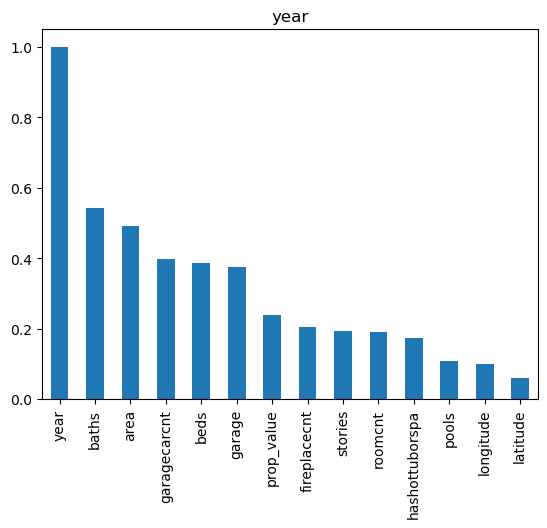

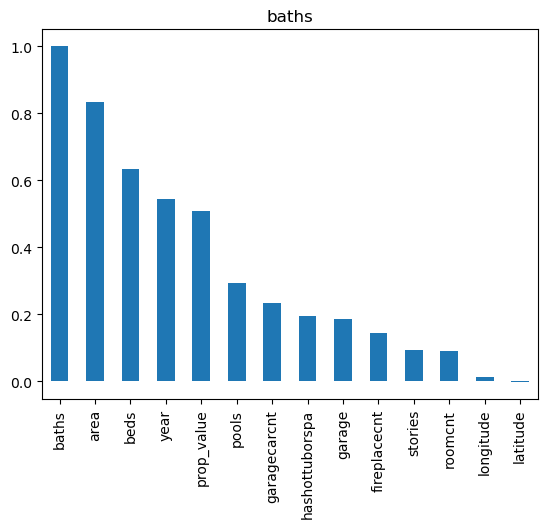

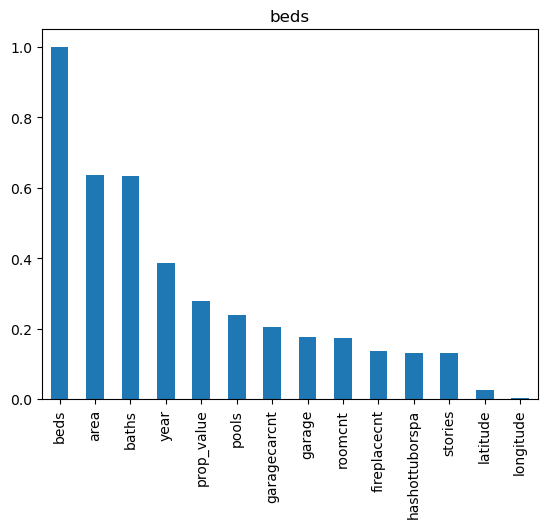

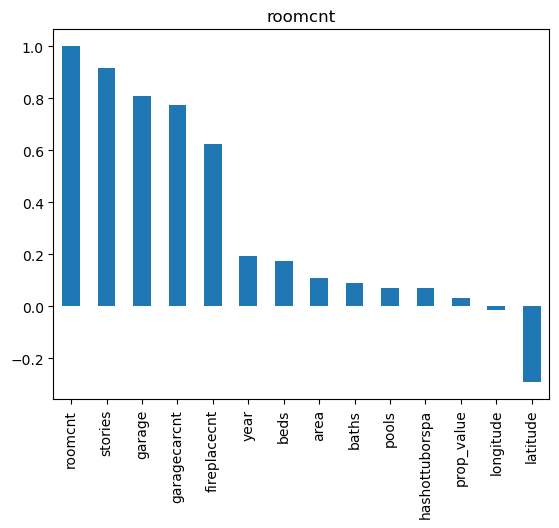

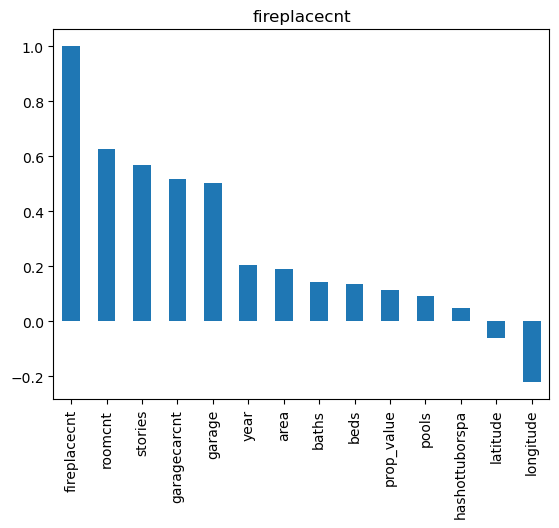

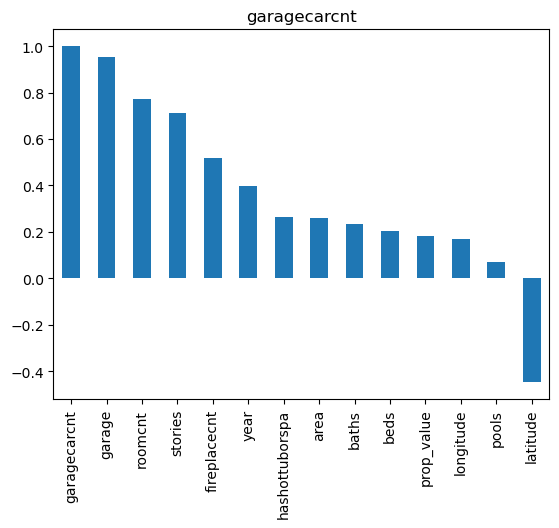

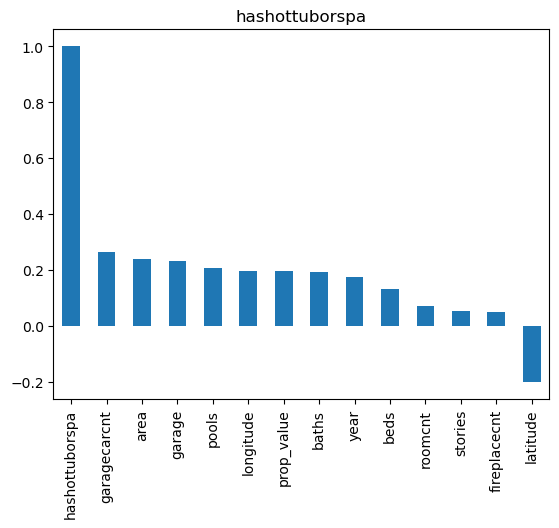

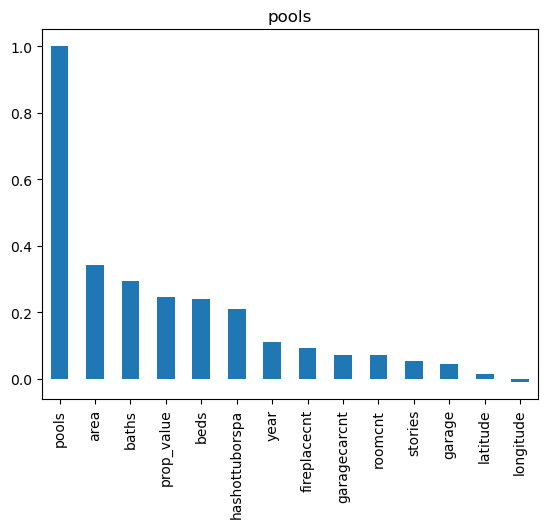

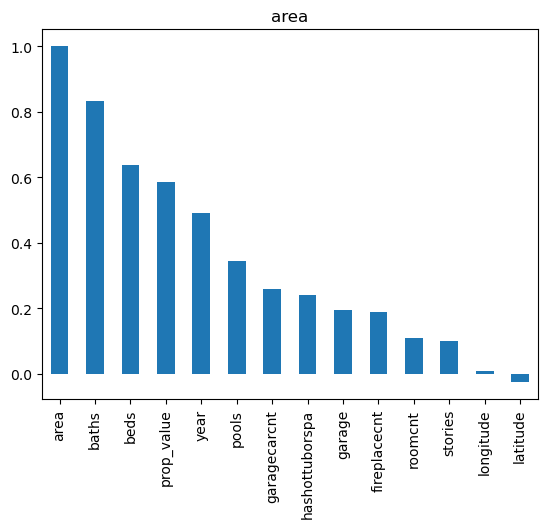

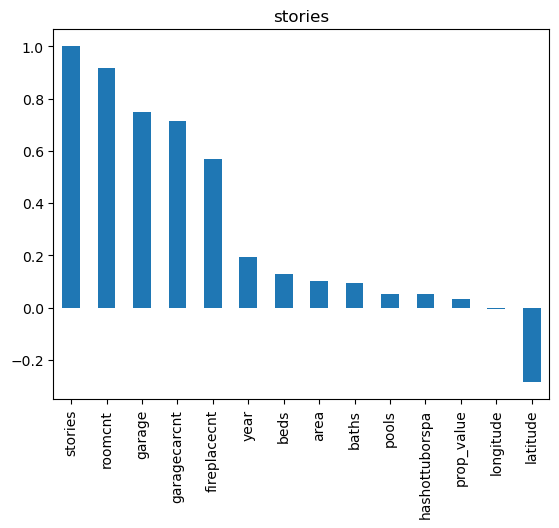

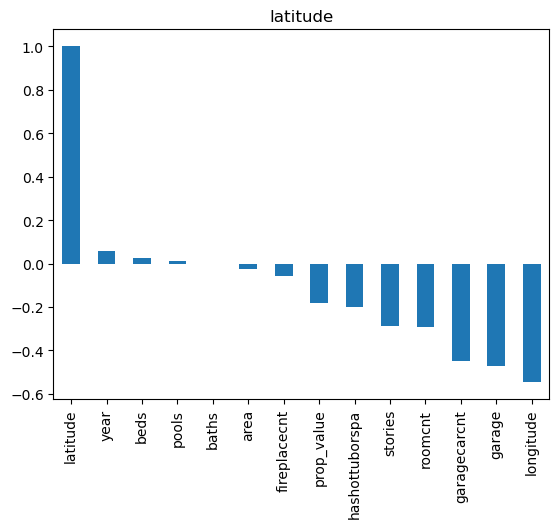

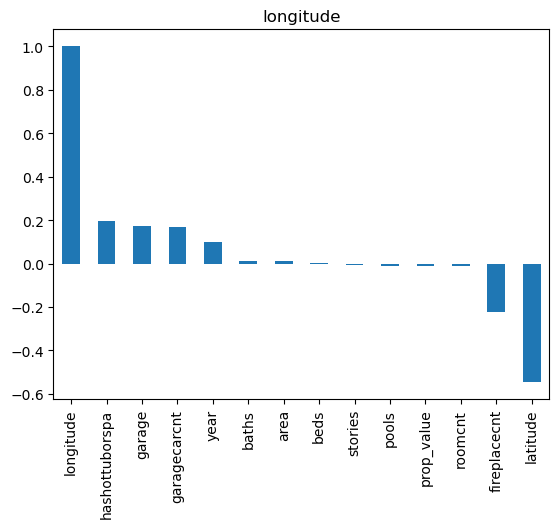

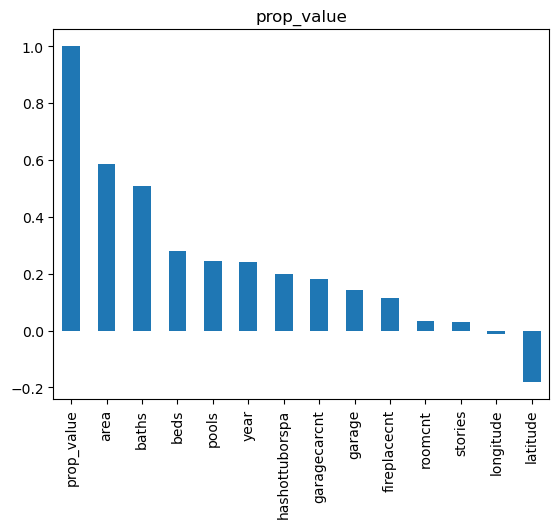

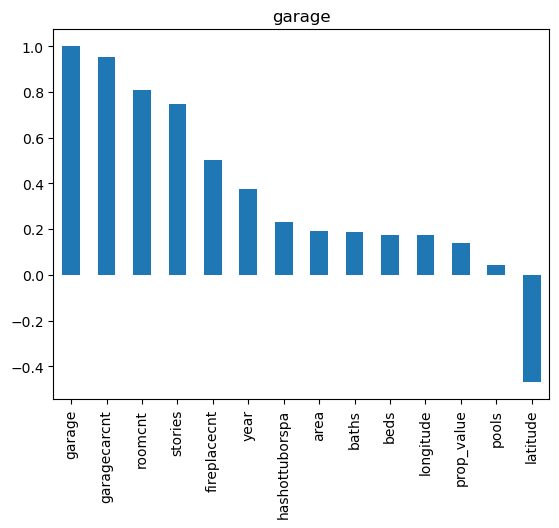

In [10]:
cols = train.drop(columns=['county']).columns.to_list()
for col in cols:
    train.corr()[col].sort_values(ascending = False).plot(kind='bar')
    plt.title(col)
    plt.show()

In [11]:
def rfe_rev(X,y,f,show_df=False):
    lr = LinearRegression()
    rfe = RFE(lr,n_features_to_select=f)
    rfe.fit(X,y)
    if show_df==True:
        rfe_ranks_df = pd.DataFrame({'Var':X.columns.to_list(),'Rank':rfe.ranking_})
        return rfe_ranks_df.sort_values('Rank')
    else:
        f_mask = rfe.support_
        return X.iloc[:,f_mask].columns.to_list()

In [12]:
train,val,test = w.encode_county(train),w.encode_county(val),w.encode_county(test)
X_train,X_val,X_test = train.drop(columns=['prop_value','county']),val.drop(columns=['prop_value','county']),test.drop(columns=['prop_value','county'])
Xs_train,Xs_val,Xs_test = w.std_zillow(X_train,X_val,X_test)
y_train,y_val,y_test = train[['prop_value']],val[['prop_value']],test[['prop_value']]

In [13]:
df1 = None
feat = Xs_train.drop(columns=['year_s','hashottuborspa_s','fireplacecnt_s','stories_s','garagecarcnt_s']).columns
for r in range(1,13):
    dfr = rfe_rev(Xs_train[feat],y_train,r,True)
    dfr = dfr.assign(n_features=r)
    df1 = pd.concat([df1,dfr]) if df1 is not None else dfr


In [14]:
df1

,Var,Rank,n_features
4,area_s,1,1
5,latitude_s,2,1
6,longitude_s,3,1
1,beds_s,4,1
0,baths_s,5,1
...,...,...,...
5,latitude_s,1,12
6,longitude_s,1,12
7,garage_s,1,12
8,Orange_s,1,12


In [15]:
df1.groupby(['Var']).Rank.mean().sort_values()

Var
area_s         1.000000
latitude_s     1.083333
longitude_s    1.250000
beds_s         1.500000
baths_s        1.833333
roomcnt_s      2.250000
Orange_s       2.750000
pools_s        3.333333
garage_s       4.000000
Ventura_s      4.750000
Name: Rank, dtype: float64

In [16]:
train[['latitude','longitude']] = train[['latitude','longitude']]/1000000

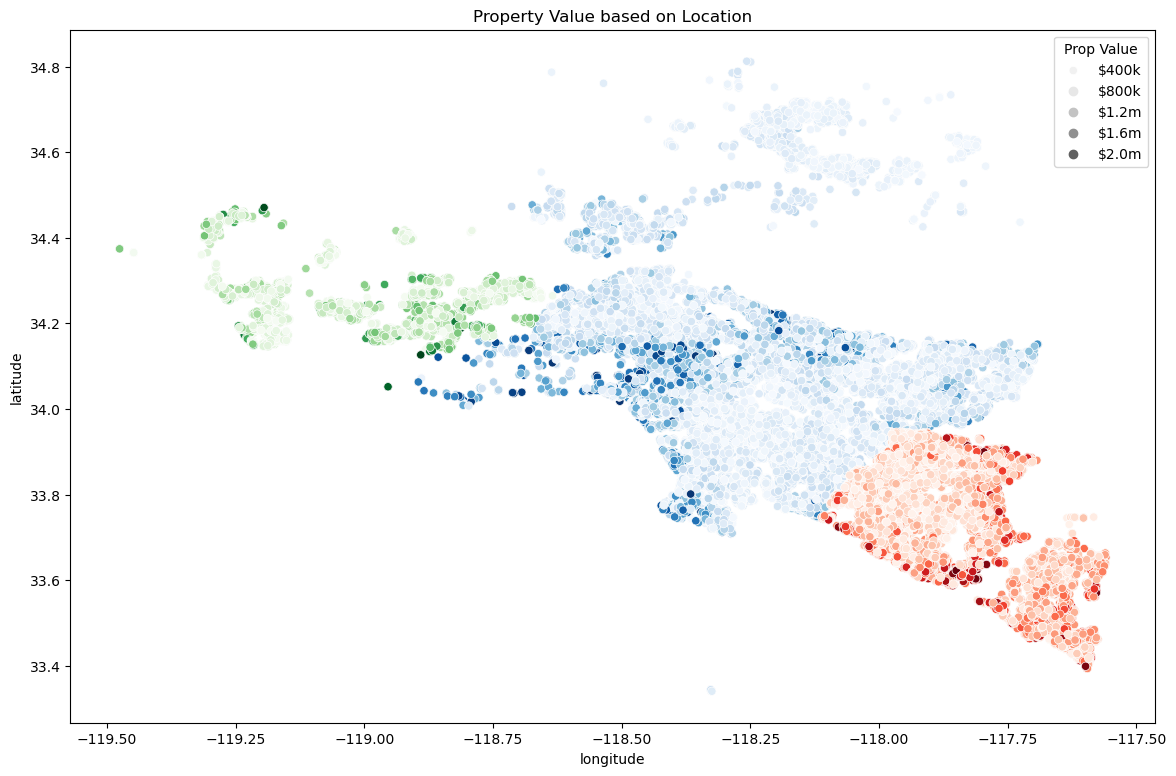

In [17]:
# prop value and county based on lat n long
# H0 = No correlation
# Ha = Yes correlation

# plt.figure(figsize=[14,9])
# sns.scatterplot(data=train,y='latitude',x='longitude',hue='county')
# sns.scatterplot(data=train,y='latitude',x='longitude',hue='prop_value',marker='o',alpha=.3)
# # plt.legend(title='County/Prop Value',labels=['','LA','Orange','Ventura','','$400k','$800k','$1.2m','$1.6m','$2.0m'])
# plt.title('Property Value based on Location')
# plt.show()

plt.figure(figsize=[14,9])
sns.scatterplot(data=train,y='latitude',x='longitude',hue='prop_value',palette='Greys',alpha=1)
sns.scatterplot(data=train[train.county=='LA'],y='latitude',x='longitude',hue='prop_value',palette='Blues')
sns.scatterplot(data=train[train.county=='Orange'],y='latitude',x='longitude',hue='prop_value',palette='Reds')
sns.scatterplot(data=train[train.county=='Ventura'],y='latitude',x='longitude',hue='prop_value',palette='Greens')
plt.legend(title='Prop Value',labels=['$400k','$800k','$1.2m','$1.6m','$2.0m'])
plt.title('Property Value based on Location')
plt.show()

In [18]:
cols = train.columns.to_list()
spears = []
for col in itertools.permutations(cols,2):
    r,p = stats.spearmanr(train[col[0]], train[col[1]])
    output = {
            'column1':col[0],
            'column2':col[1],
            'r':round(r,6),
            'p':round(p,6)
        }
    spears.append(output)
df2 = pd.DataFrame(spears)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [19]:
df2

,column1,column2,r,p
0,year,baths,0.593825,0.0
1,year,beds,0.428700,0.0
2,year,roomcnt,0.247870,0.0
3,year,fireplacecnt,0.238857,0.0
4,year,garagecarcnt,0.441965,0.0
...,...,...,...,...
267,Ventura,latitude,0.327744,0.0
268,Ventura,longitude,-0.476410,0.0
269,Ventura,prop_value,0.065684,0.0
270,Ventura,garage,0.405301,0.0


In [20]:
# Does area correlate with prop_value?
# H0 = No correlation
# Ha = Yes correlation
# sns.regplot(data=train,x='area',y='prop_value',marker='.',line_kws={'color':'orange'})
# plt.show()

In [21]:
# pear(train,'area','prop_value')

In [22]:
# less than alpha = .05
# yes correlation

In [23]:
train.prop_value.mean()

454401.6769190584

In [24]:
y_train.mean()[0]

454401.6769190584

In [25]:
def metrics_reg(y, yhat):
    """
    send in y_true, y_pred & returns RMSE, R2
    """
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [28]:
def reg_mods(Xtr,ytr,Xv,yv,features=None,alpha=1,degree=2,power=2):
    '''
    Input X_train,y_train,X_val,y_val, list of features, and alpha, degree, and power
    so that function will run through linear regression, lasso lars,
    polynomial feature regression, and tweedie regressor (glm)
    - diff feature combos
    - diff hyper params
    - output as df
    '''
    if features is None:
        features = Xtr.columns.to_list()
    # baseline as mean
    pred_mean = ytr.mean()[0]
    ytr_p = ytr.assign(pred_mean=pred_mean)
    yv_p = yv.assign(pred_mean=pred_mean)
    rmse_tr = mean_squared_error(ytr,ytr_p.pred_mean)**.5
    rmse_v = mean_squared_error(yv,yv_p.pred_mean)**.5
    r2_tr = r2_score(ytr, ytr_p.pred_mean)
    r2_v = r2_score(yv, yv_p.pred_mean)
    output = {
            'model':'bl_mean',
            'features':'None',
            'params':'None',
            'rmse_tr':rmse_tr,
            'rmse_v':rmse_v,
            'r2_tr':r2_tr,
            'r2_v':r2_v
        }
    metrics = [output]
    # create iterable for feature combos
    for r in range(1,(len(features)+1)):
        # cycle through feature combos for linear reg
        for feature in itertools.combinations(features,r):
            f = list(feature)
            # linear regression
            lr = LinearRegression()
            lr.fit(Xtr[f],ytr)
            # metrics
            pred_lr_tr = lr.predict(Xtr[f])
            rmse_tr,r2_tr = metrics_reg(ytr,pred_lr_tr)
            pred_lr_v = lr.predict(Xv[f])
            rmse_v,r2_v = metrics_reg(yv,pred_lr_v)
            # table-ize
            output ={
                    'model':'LinearRegression',
                    'features':f,
                    'params':'None',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos and alphas for lasso lars
        for feature,a in itertools.product(itertools.combinations(features,r),alpha):
            f = list(feature)
            # lasso lars
            ll = LassoLars(alpha=a,normalize=False,random_state=42)
            ll.fit(Xtr[f],ytr)
            # metrics
            pred_ll_tr = ll.predict(Xtr[f])
            rmse_tr,r2_tr = metrics_reg(ytr,pred_ll_tr)
            pred_ll_v = ll.predict(Xv[f])
            rmse_v,r2_v = metrics_reg(yv,pred_ll_v)
            # table-ize
            output ={
                    'model':'LassoLars',
                    'features':f,
                    'params':f'alpha={a}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos and degrees for polynomial feature reg
        for feature,d in itertools.product(itertools.combinations(features,r),degree):
            f = list(feature)
            # polynomial feature regression
            pf = PolynomialFeatures(degree=d)
            Xtr_pf = pf.fit_transform(Xtr[f])
            Xv_pf = pf.transform(Xv[f])
            lp = LinearRegression()
            lp.fit(Xtr_pf,ytr)
            # metrics
            pred_lp_tr = lp.predict(Xtr_pf)
            rmse_tr,r2_tr = metrics_reg(ytr,pred_lp_tr)
            pred_lp_v = lp.predict(Xv_pf)
            rmse_v,r2_v = metrics_reg(yv,pred_lp_v)
            # table-ize
            output ={
                    'model':'PolynomialFeature',
                    'features':f,
                    'params':f'degree={d}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
    return pd.DataFrame(metrics)

In [29]:
feat = Xs_train.drop(columns=['year_s','hashottuborspa_s','fireplacecnt_s','stories_s','garagecarcnt_s']).columns
metrics = reg_mods(Xs_train,y_train,Xs_val,y_val,features=feat,alpha=[1,2],degree=[2,3,4])
metrics

,model,features,params,rmse_tr,rmse_v,r2_tr,r2_v
0,bl_mean,None,None,376239.858068,3.745076e+05,0.000000,-1.387648e-06
1,LinearRegression,[baths_s],None,323706.135506,3.225061e+05,0.259760,2.584248e-01
2,LinearRegression,[beds_s],None,361271.440634,3.604273e+05,0.077986,7.377885e-02
3,LinearRegression,[roomcnt_s],None,376035.633968,3.742777e+05,0.001085,1.225882e-03
4,LinearRegression,[pools_s],None,364814.942819,3.646785e+05,0.059810,5.180064e-02
...,...,...,...,...,...,...,...
6134,LassoLars,"[baths_s, beds_s, roomcnt_s, pools_s, area_s, ...",alpha=1,286755.127459,2.901637e+05,0.419111,3.997038e-01
6135,LassoLars,"[baths_s, beds_s, roomcnt_s, pools_s, area_s, ...",alpha=2,286755.128345,2.901637e+05,0.419111,3.997040e-01
6136,PolynomialFeature,"[baths_s, beds_s, roomcnt_s, pools_s, area_s, ...",degree=2,279087.645491,2.840752e+05,0.449761,4.246317e-01
6137,PolynomialFeature,"[baths_s, beds_s, roomcnt_s, pools_s, area_s, ...",degree=3,273045.270722,2.817872e+05,0.473329,4.338625e-01


In [ ]:
# poly best f=['beds_s', 'roomcnt_s', 'area_s', 'latitude_s', 'longitude_s', 'Orange_s', 'Ventura_s'], degree=4
# lin reg f=['baths_s', 'beds_s', 'roomcnt_s', 'pools_s', 'area_s', 'latitude_s', 'longitude_s', 'Orange_s']
# lasso f=['baths_s', 'beds_s', 'roomcnt_s', 'pools_s', 'area_s', 'latitude_s', 'longitude_s', 'Orange_s'], alpha=1

In [36]:
def final_model(model,X_train,y_train,X_val,y_val):
    if model == 'lr':
        # features
        f=['baths_s', 'beds_s', 'roomcnt_s', 'pools_s', 'area_s', 'latitude_s', 'longitude_s', 'Orange_s']
        # model
        lr = LinearRegression()
        lr.fit(X_train[f],y_train)
        # metrics
        pred_lr_tr = lr.predict(X_train[f])
        rmse_tr,r2_tr = metrics_reg(y_train,pred_lr_tr)
        pred_lr_v = lr.predict(X_val[f])
        rmse_v,r2_v = metrics_reg(y_val,pred_lr_v)
        print('Linear Regression')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'poly':
        # features
        f=['beds_s', 'roomcnt_s', 'area_s', 'latitude_s', 'longitude_s', 'Orange_s', 'Ventura_s']
        # polynomial feature regression
        pf = PolynomialFeatures(degree=4)
        X_train_pf = pf.fit_transform(X_train[f])
        X_val_pf = pf.transform(X_val[f])
        # model
        pr = LinearRegression()
        pr.fit(X_train_pf,y_train)
        # metrics
        pred_pr_tr = pr.predict(X_train_pf)
        rmse_tr,r2_tr = metrics_reg(y_train,pred_pr_tr)
        pred_pr_v = pr.predict(X_val_pf)
        rmse_v,r2_v = metrics_reg(y_val,pred_pr_v)
        print('Polynomial Features through Linear Regression')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'lasso':
        # features
        f=['baths_s', 'beds_s', 'roomcnt_s', 'pools_s', 'area_s', 'latitude_s', 'longitude_s', 'Orange_s']
        # model
        ll = LassoLars(alpha=1,normalize=False)
        ll.fit(X_train[f],y_train)
        # metrics
        pred_ll_tr = ll.predict(X_train[f])
        rmse_tr,r2_tr = metrics_reg(y_train,pred_ll_tr)
        pred_ll_v = ll.predict(X_val[f])
        rmse_v,r2_v = metrics_reg(y_val,pred_ll_v)
        print('Lasso Lars')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    else:
        print('Please include model argument: lr, poly, lasso')

In [37]:
final_model('lr',Xs_train,y_train,Xs_val,y_val)

Linear Regression
Train       RMSE: 286825.5708149342   R2: 0.418826063860247
Validate    RMSE: 290183.21679864044    R2: 0.39962318749466286


In [38]:
final_model('poly',Xs_train,y_train,Xs_val,y_val)

Polynomial Features through Linear Regression
Train       RMSE: 270119.56427583226   R2: 0.48455482670227545
Validate    RMSE: 278917.8404197504    R2: 0.44533352499440015


In [39]:
final_model('lasso',Xs_train,y_train,Xs_val,y_val)

Lasso Lars
Train       RMSE: 286825.5708572803   R2: 0.4188260636886413
Validate    RMSE: 290183.1765544516    R2: 0.39962335402170324


In [40]:
def test_model(X_train,y_train,X_test,y_test):
    # features
    f=['beds_s', 'roomcnt_s', 'area_s', 'latitude_s', 'longitude_s', 'Orange_s', 'Ventura_s']
    # polynomial feature regression
    pf = PolynomialFeatures(degree=4)
    X_train_pf = pf.fit_transform(X_train[f])
    X_test_pf = pf.transform(X_test[f])
    # model
    pr = LinearRegression()
    pr.fit(X_train_pf,y_train)
    # metrics
    pred_pr_t = pr.predict(X_test_pf)
    rmse_t,r2_t = metrics_reg(y_test,pred_pr_t)
    print('Polynomial Features through Linear Regression')
    print(f'Test    RMSE: {rmse_t}    R2: {r2_t}')

In [41]:
test_model(Xs_train,y_train,Xs_test,y_test)

Polynomial Features through Linear Regression
Test    RMSE: 276008.0347853944    R2: 0.46491209509802556
